<a href="https://colab.research.google.com/github/ergul13/hands-on/blob/main/hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
X = data.data
y = data.target

In [7]:
print(X.shape)

(569, 30)


In [8]:
print(y.shape)

(569,)


veri ölçeklendirme

In [11]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size = 0.2, random_state = 42)

In [14]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [15]:
def initialize_weights(dim):
    """
    Ağırlık vektörünü (dim, 1) boyutunda sıfırlarla ve sapmayı (b) 0 olarak başlatır.
    dim: Ağırlık sayımız, yani veri setindeki özellik sayısı.
    """
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [16]:
def compute_loss_and_gradient(X, y, w, b):
    """
    İleri yayılım ile kaybı ve geri yayılım ile gradyanları hesaplar.
    """
    m = X.shape[0] # Örnek sayısı

    # İLERİ YAYILIM (FORWARD PROPAGATION)
    # 1. Lineer adımı hesapla
    z = np.dot(X, w) + b
    # 2. Aktivasyonu (tahmini) hesapla
    A = sigmoid(z)
    # 3. Kaybı (cost) hesapla
    # Not: y'nin boyutunu (m,) den (m,1)'e çeviriyoruz ki matris işlemleri doğru olsun.
    cost = - (1 / m) * np.sum(y.reshape(-1,1) * np.log(A) + (1 - y.reshape(-1,1)) * np.log(1 - A))

    # GERİ YAYILIM (BACKWARD PROPAGATION) - Gradyanları Hesaplama
    # Türev formüllerinin NumPy'daki karşılığı:
    dw = (1 / m) * np.dot(X.T, (A - y.reshape(-1,1)))
    db = (1 / m) * np.sum(A - y.reshape(-1,1))

    # Gradyanları ve kaybı bir sözlük yapısında saklayalım
    grads = {"dw": dw,
             "db": db}

    return grads, np.squeeze(cost) # cost'u skaler değere dönüştür

In [17]:
def train(X_train, y_train, epochs, learning_rate):
    """
    Gradyan inişi kullanarak parametreleri (w, b) optimize eder (öğrenir).
    """
    # 1. Ağırlıkları ve sapmayı başlat
    dim = X_train.shape[1]
    w, b = initialize_weights(dim)

    costs = [] # Kaybı her adımda kaydedeceğimiz liste

    # 2. Gradyan inişi döngüsü
    for i in range(epochs):
        # Kaybı ve gradyanı hesapla
        grads, cost = compute_loss_and_gradient(X_train, y_train, w, b)

        # Ağırlıkları ve sapmayı güncelle
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Her 100 adımda bir kaybı kaydet ve ekrana yazdır
        if i % 100 == 0:
            costs.append(cost)
            print(f"Epoch {i}, Cost: {cost}")

    # Öğrenilen parametreleri ve maliyet geçmişini sakla
    params = {"w": w, "b": b}

    return params, costs

Epoch 0, Cost: 0.6931471805599453
Epoch 100, Cost: 0.10927219048562781
Epoch 200, Cost: 0.0894211376298658
Epoch 300, Cost: 0.08065160153435465
Epoch 400, Cost: 0.07538596974086224
Epoch 500, Cost: 0.07174602576071092
Epoch 600, Cost: 0.069017371814038
Epoch 700, Cost: 0.06686228256419538
Epoch 800, Cost: 0.06509773671019906
Epoch 900, Cost: 0.06361466528213246
Epoch 1000, Cost: 0.06234333292923799
Epoch 1100, Cost: 0.06123666099191701
Epoch 1200, Cost: 0.06026145606221715
Epoch 1300, Cost: 0.059393467670385544
Epoch 1400, Cost: 0.05861444460269994
Epoch 1500, Cost: 0.0579102999060463
Epoch 1600, Cost: 0.05726992293293562
Epoch 1700, Cost: 0.05668438555600131
Epoch 1800, Cost: 0.05614639737651421
Epoch 1900, Cost: 0.05564992306322247
Epoch 2000, Cost: 0.055189907922568456
Epoch 2100, Cost: 0.054762077196850195
Epoch 2200, Cost: 0.054362786435664785
Epoch 2300, Cost: 0.053988907776762185
Epoch 2400, Cost: 0.05363774184673962


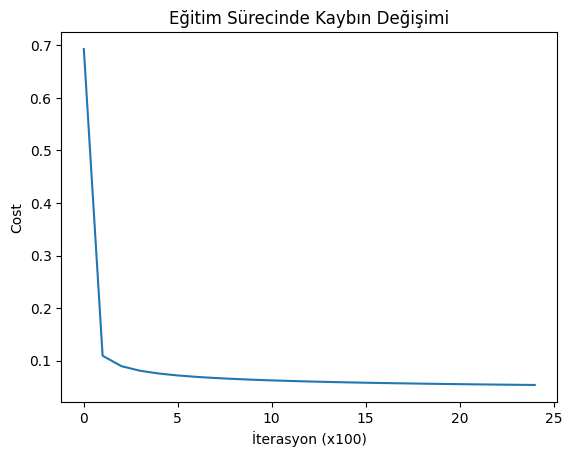

In [36]:
# Hiperparametreleri belirle
epochs = 2500
learning_rate = 0.09

# Modeli eğit
trained_params, costs_history = train(X_train, y_train, epochs, learning_rate)

# Öğrenme eğrisini çizdir
plt.plot(costs_history)
plt.title("Eğitim Sürecinde Kaybın Değişimi")
plt.xlabel("İterasyon (x100)")
plt.ylabel("Cost")
plt.show()

In [37]:
def predict(X, w, b):
    """
    Öğrenilen parametreler (w, b) ile X için 0 veya 1 tahmini yapar.
    """
    m = X.shape[0]
    y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1) # Boyut uyumluluğunu garantile

    # Olasılıkları hesapla (A)
    A = sigmoid(np.dot(X, w) + b)

    # Olasılıkları 0 veya 1'e çevir
    for i in range(A.shape[0]):
        if A[i, 0] > 0.5:
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0

    return y_prediction.flatten() # (1,m) yerine (m,) boyutunda döndür

In [38]:
# Kendi modelimizle test seti üzerinde tahmin yapalım
w = trained_params["w"]
b = trained_params["b"]
my_predictions = predict(X_test, w, b)
my_accuracy = 100 - np.mean(np.abs(my_predictions - y_test)) * 100
print(f"Kendi Modelimin Test Doğruluğu: {my_accuracy:.2f}%")

# Şimdi de scikit-learn ile yapalım
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
sklearn_accuracy = log_reg.score(X_test, y_test) * 100
print(f"Scikit-learn Modelinin Test Doğruluğu: {sklearn_accuracy:.2f}%")

Kendi Modelimin Test Doğruluğu: 99.12%
Scikit-learn Modelinin Test Doğruluğu: 97.37%
